In [502]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [503]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
import pickle

In [ ]:
pd.set_option('max_rows', 99999)
pd.set_option('max_colwidth', 400)
pd.describe_option('max_colwidth')

In [504]:
#reading the csv files
application_record = pd.read_csv('/content/drive/MyDrive/DATA SCIENCE/CASE STUDY 1/application_record.csv')
credit_record = pd.read_csv('/content/drive/MyDrive/DATA SCIENCE/CASE STUDY 1/credit_record.csv')

In [505]:
application_record.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


# 1. DATA PREPROCESSING

In [506]:
application_record.shape

(438557, 18)

In [507]:
application_record.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [508]:
application_record.isnull().sum(axis = 0)

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134203
CNT_FAM_MEMBERS             0
dtype: int64

Observations:

*   We see that there are many applicants whose occupation type is not mentioned.
* Apart from OCCUPATION_TYPE, we donot have any NULL VALUES.


### 1.1 OCCUPATION_TYPE

*   We have seen that there are many fields which does not have any occupation. For those, we can use use Nan as a new category.
*   This will help while performing EDA
*   Later **we will use other features to train and determine the occupation types of the applicants who does not have their occupation types**


In [509]:
application_record["OCCUPATION_TYPE"].fillna("NAN",inplace = True)

In [510]:
application_record["OCCUPATION_TYPE"].unique()

array(['NAN', 'Security staff', 'Sales staff', 'Accountants', 'Laborers',
       'Managers', 'Drivers', 'Core staff', 'High skill tech staff',
       'Cleaning staff', 'Private service staff', 'Cooking staff',
       'Low-skill Laborers', 'Medicine staff', 'Secretaries',
       'Waiters/barmen staff', 'HR staff', 'Realty agents', 'IT staff'],
      dtype=object)

### 1.2 DAYS_BIRTH --> AGE

> This basically indicates the date of birth. It is a negative number that indicates number of days prior to which the applicant was born.
*  For Example, if the value is -10, then it means the applicant was born 10 days ago

> This being not in a readable format, we will convert this number into the applicants age which has much more clarity. **Instead of this feature, we will be using a feature named AGE**
* For example if the `days_birth` value is -365, the new feature AGE will be 1(years old)
* Also we will be using the floor value. Suppose the `days_birth` value is -700 it still will be 1


In [511]:
application_record["DAYS_BIRTH"] = application_record["DAYS_BIRTH"]//(-365)

In [512]:
application_record.rename(columns = {'DAYS_BIRTH':'AGE'}, inplace = True)

### 1.3 DAYS_EMPLOYED

> This basically indicates the number of days the applicant has been employed. It is a number that indicates number of days prior to which the applicant was born.For Example,
*  if the value is -10, then it means the applicant has been 10 days ago
*  if the value is 10, then it means that the applicant is unemployed for 10 days(*If positive, it means the person currently unemployed.*)

> **We will convert this number in terms of years which has much more clarity.** 
* For example if the `DAYS_EMPLOYED` value is -365, the new feature YEAR_EMPLOYED will be 1(years)
* Also we will be using the floor value. Suppose the `days_birth` value is -700 it still will be 1
* We will drop the DAYS_EMPLOYED feature

In [513]:
application_record["DAYS_EMPLOYED"].unique()

array([-4542, -1134, -3051, ..., -8300, -9020, -4884])

In [514]:
application_record["DAYS_EMPLOYED"].value_counts()

 365243    75329
-218         262
-1678        251
-249         241
-978         240
           ...  
-13529         1
-10223         1
-8917          1
-11429         1
-8105          1
Name: DAYS_EMPLOYED, Length: 9406, dtype: int64

In [515]:
application_record["YEARS_EMPLOYED"] = application_record["DAYS_EMPLOYED"]//(-365)

In [516]:
application_record["YEARS_EMPLOYED"].unique()

array([   12,     3,     8, -1001,     2,     4,     5,    19,    14,
          13,     7,     6,    17,    29,     1,    15,    11,     0,
          10,    23,    24,    20,     9,    27,    26,    18,    21,
          22,    16,    28,    38,    32,    31,    36,    37,    30,
          39,    25,    34,    33,    41,    40,    35,    43,    42,
          44,    48,    45])

#### Observations and Modifications:
* We see that people who are not employed (represented in negative in years), **each and everyone of them have the same no of unemployment years which is 1001** years

* So we will **replace the number of days of unemployment with their age.**


In [517]:
year_employed_list = application_record["YEARS_EMPLOYED"].to_list()
age_list = application_record["AGE"].to_list()
temp_list = []
# replacing all negative YEARS_EMPLOYED by their AGE
for i,each in enumerate(year_employed_list):
  if each < 0:
    temp_list.append((-1)*age_list[i])
  else:
    temp_list.append(each)


In [518]:
x = np.array(temp_list)
np.unique(x)

array([-69, -68, -67, -66, -65, -64, -63, -62, -61, -60, -59, -58, -57,
       -56, -55, -54, -53, -52, -51, -50, -49, -48, -47, -46, -45, -44,
       -43, -42, -41, -40, -39, -38, -37, -36, -35, -34, -33, -32, -31,
       -30, -29, -28, -27, -26, -25, -24, -23, -22,   0,   1,   2,   3,
         4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,  15,  16,
        17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,  28,  29,
        30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,  42,
        43,  44,  45,  48])

In [519]:
application_record["YEARS_EMPLOYED"] = temp_list
application_record["YEARS_EMPLOYED"].value_counts()

 1     38719
 2     37405
 0     33628
 3     33524
 4     30922
       ...  
 48        6
-22        4
-25        3
-69        2
-24        1
Name: YEARS_EMPLOYED, Length: 95, dtype: int64

In [520]:
application_record = application_record.drop(['DAYS_EMPLOYED'],axis = 1)

# 2. Exploratory Data Analysis


## 2.1 Application Record Table

In [521]:
application_record.describe()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,AGE,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,YEARS_EMPLOYED
count,4.385570e+05,438557.000000,4.385570e+05,438557.000000,438557.0,438557.000000,438557.000000,438557.000000,438557.000000,438557.000000
mean,6.022176e+06,0.427390,1.875243e+05,43.326489,1.0,0.206133,0.287771,0.108207,2.194465,-4.596930
std,5.716370e+05,0.724882,1.100869e+05,11.467500,0.0,0.404527,0.452724,0.310642,0.897207,25.571063
min,5.008804e+06,0.000000,2.610000e+04,20.000000,1.0,0.000000,0.000000,0.000000,1.000000,-69.000000
25%,5.609375e+06,0.000000,1.215000e+05,34.000000,1.0,0.000000,0.000000,0.000000,2.000000,1.000000
50%,6.047745e+06,0.000000,1.607805e+05,42.000000,1.0,0.000000,0.000000,0.000000,2.000000,4.000000
75%,6.456971e+06,1.000000,2.250000e+05,53.000000,1.0,0.000000,1.000000,0.000000,3.000000,8.000000
max,7.999952e+06,19.000000,6.750000e+06,69.000000,1.0,1.000000,1.000000,1.000000,20.000000,48.000000


### CODE_GENDER

* Represents the gender of the applicants
* M-male and F-Female



In [522]:
application_record["CODE_GENDER"].unique()

array(['M', 'F'], dtype=object)

In [523]:
application_record["CODE_GENDER"].value_counts()

F    294440
M    144117
Name: CODE_GENDER, dtype: int64

Text(0, 0.5, 'frequency')

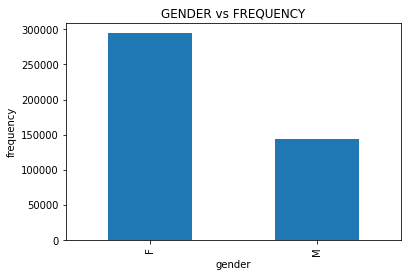

In [524]:
application_record['CODE_GENDER'].value_counts().plot(kind='bar')
plt.title('GENDER vs FREQUENCY')
plt.xlabel('gender')
plt.ylabel('frequency')

Observations:


*   There is significantly more number of female applicants as compared to that of male applicants
* Numbe of female applicants are almost double the number of male applicants.


### FLAG_OWN_CAR
* Represents if the owner owns a car or not
* N represents applicant doesnot own a car
* Y represents applicant owns a car

In [525]:
application_record["FLAG_OWN_CAR"].unique()

array(['Y', 'N'], dtype=object)

In [526]:
application_record["FLAG_OWN_CAR"].value_counts()

N    275459
Y    163098
Name: FLAG_OWN_CAR, dtype: int64

Text(0, 0.5, 'frequency')

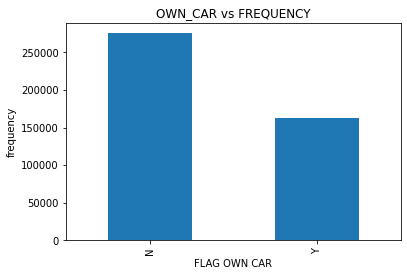

In [527]:
application_record['FLAG_OWN_CAR'].value_counts().plot(kind='bar')
plt.title('OWN_CAR vs FREQUENCY')
plt.xlabel('FLAG OWN CAR')
plt.ylabel('frequency')

Text(0, 0.5, 'frequency')

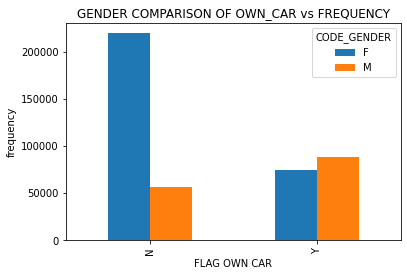

In [528]:
application_record.groupby(["FLAG_OWN_CAR", "CODE_GENDER"]).size().unstack(level=1).plot(kind='bar')
plt.title('GENDER COMPARISON OF OWN_CAR vs FREQUENCY')
plt.xlabel('FLAG OWN CAR')
plt.ylabel('frequency')

Observations:


*   There is significantly more number applicants who does not own a car
*   Comparatively more number of Male applicants have a car



### FLAG_OWN_REALTY
* Represents if the owner owns a reality estate or not
* N represents applicant doesnot own a reality estate
* Y represents applicant owns a reailty estate

In [529]:
application_record["FLAG_OWN_REALTY"].unique()

array(['Y', 'N'], dtype=object)

In [530]:
application_record["FLAG_OWN_REALTY"].value_counts()

Y    304074
N    134483
Name: FLAG_OWN_REALTY, dtype: int64

Text(0, 0.5, 'frequency')

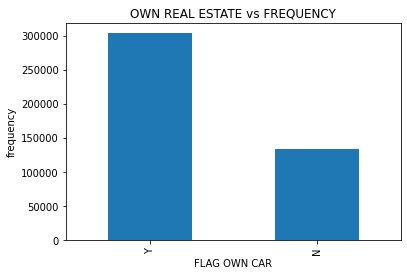

In [531]:
application_record['FLAG_OWN_REALTY'].value_counts().plot(kind='bar')
plt.title('OWN REAL ESTATE vs FREQUENCY')
plt.xlabel('FLAG OWN CAR')
plt.ylabel('frequency')

Text(0, 0.5, 'frequency')

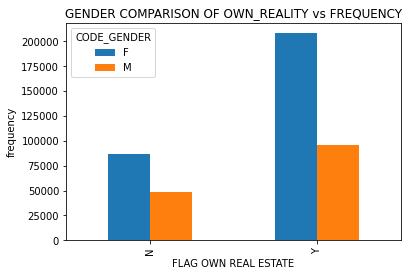

In [532]:
application_record.groupby(["FLAG_OWN_REALTY", "CODE_GENDER"]).size().unstack(level=1).plot(kind='bar')
plt.title('GENDER COMPARISON OF OWN_REALITY vs FREQUENCY')
plt.xlabel('FLAG OWN REAL ESTATE')
plt.ylabel('frequency')

Conclusion:


*   There is significantly more number applicants who owns a reality estate

* Keeping in mind that number of female applicants are double, ratio of owning a real estate is almost similar between male and female.

### NAME_INCOME_TYPE


*   Tells us about the source of income for the applicants.


In [533]:
application_record["NAME_INCOME_TYPE"].unique()

array(['Working', 'Commercial associate', 'Pensioner', 'State servant',
       'Student'], dtype=object)

In [534]:
application_record["NAME_INCOME_TYPE"].value_counts()

Working                 226104
Commercial associate    100757
Pensioner                75493
State servant            36186
Student                     17
Name: NAME_INCOME_TYPE, dtype: int64

Text(0, 0.5, 'frequency')

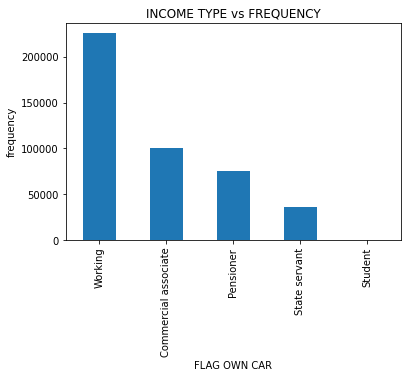

In [535]:
application_record['NAME_INCOME_TYPE'].value_counts().plot(kind='bar')
plt.title('INCOME TYPE vs FREQUENCY')
plt.xlabel('FLAG OWN CAR')
plt.ylabel('frequency')

Text(0, 0.5, 'frequency')

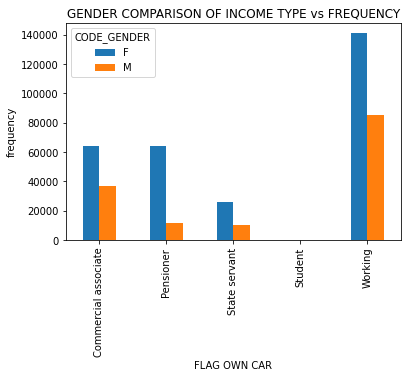

In [536]:
application_record.groupby(["NAME_INCOME_TYPE", "CODE_GENDER"]).size().unstack(level=1).plot(kind='bar')
plt.title('GENDER COMPARISON OF INCOME TYPE vs FREQUENCY')
plt.xlabel('FLAG OWN CAR')
plt.ylabel('frequency')

Observations:

* There are total five types income types in the records i.e. 'Working', 'Commercial associate', 'Pensioner', 'State servant', 'Student'
*   Most of the applicants are working professionals.
*   There good number people whose are commercial associate or pensioner or state servant

### NAME_EDUCATION_TYPE
* Tells us about the education type of the applicants

In [537]:
application_record["NAME_EDUCATION_TYPE"].unique()

array(['Higher education', 'Secondary / secondary special',
       'Incomplete higher', 'Lower secondary', 'Academic degree'],
      dtype=object)

In [538]:
application_record["NAME_EDUCATION_TYPE"].value_counts()

Secondary / secondary special    301821
Higher education                 117522
Incomplete higher                 14851
Lower secondary                    4051
Academic degree                     312
Name: NAME_EDUCATION_TYPE, dtype: int64

Text(0, 0.5, 'frequency')

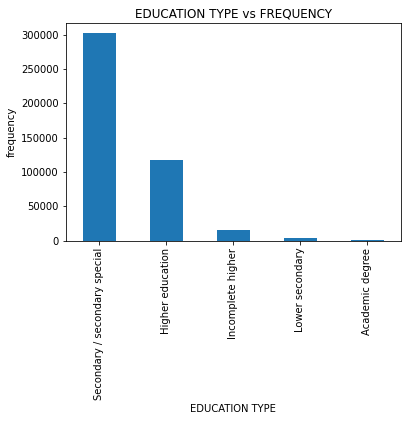

In [539]:
application_record['NAME_EDUCATION_TYPE'].value_counts().plot(kind='bar')
plt.title('EDUCATION TYPE vs FREQUENCY')
plt.xlabel('EDUCATION TYPE')
plt.ylabel('frequency')

Text(0, 0.5, 'frequency')

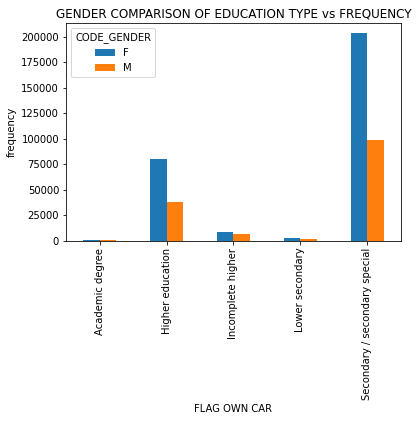

In [540]:
application_record.groupby(["NAME_EDUCATION_TYPE", "CODE_GENDER"]).size().unstack(level=1).plot(kind='bar')
plt.title('GENDER COMPARISON OF EDUCATION TYPE vs FREQUENCY')
plt.xlabel('FLAG OWN CAR')
plt.ylabel('frequency')

Observations:

* There are in total 5 types of educational qualifications and those are 'Higher education', 'Secondary / secondary special',       'Incomplete higher', 'Lower secondary', 'Academic degree'
*   Most of the applicants are have secondary education and only a few have a academic degree
*   There are quite good number of applicants with higher education
*   Also a few applicants did not complete there Higer Secondary education
* Keeping in mind that female to male ratio is almost double, we can say male applicants has higher ratio of having incomplete higher studies.

### NAME_FAMILY_STATUS
* Represents the family status of the applicant

In [541]:
application_record["NAME_FAMILY_STATUS"].unique()

array(['Civil marriage', 'Married', 'Single / not married', 'Separated',
       'Widow'], dtype=object)

In [542]:
application_record["NAME_FAMILY_STATUS"].value_counts()

Married                 299828
Single / not married     55271
Civil marriage           36532
Separated                27251
Widow                    19675
Name: NAME_FAMILY_STATUS, dtype: int64

Text(0, 0.5, 'frequency')

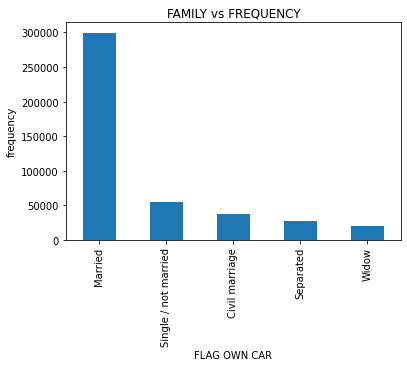

In [543]:
application_record['NAME_FAMILY_STATUS'].value_counts().plot(kind='bar')
plt.title('FAMILY vs FREQUENCY')
plt.xlabel('FLAG OWN CAR')
plt.ylabel('frequency')

Text(0, 0.5, 'frequency')

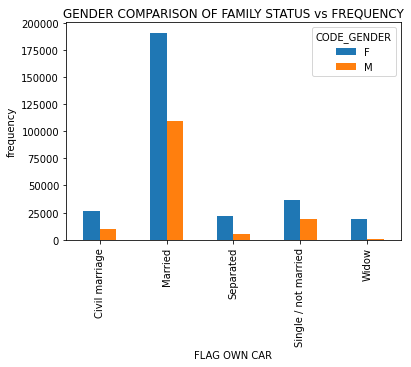

In [544]:
application_record.groupby(["NAME_FAMILY_STATUS", "CODE_GENDER"]).size().unstack(level=1).plot(kind='bar')
plt.title('GENDER COMPARISON OF FAMILY STATUS vs FREQUENCY')
plt.xlabel('FLAG OWN CAR')
plt.ylabel('frequency')

Observations:


*   Most of the applicants are married
*   The number of applicants who are single or seperated or widow or had civil marriage are similar

### NAME_HOUSING_TYPE
* Represents the type of housing of the applicant

In [545]:
application_record["NAME_HOUSING_TYPE"].unique()

array(['Rented apartment', 'House / apartment', 'Municipal apartment',
       'With parents', 'Co-op apartment', 'Office apartment'],
      dtype=object)

In [546]:
application_record["NAME_HOUSING_TYPE"].value_counts()

House / apartment      393831
With parents            19077
Municipal apartment     14214
Rented apartment         5974
Office apartment         3922
Co-op apartment          1539
Name: NAME_HOUSING_TYPE, dtype: int64

Text(0, 0.5, 'frequency')

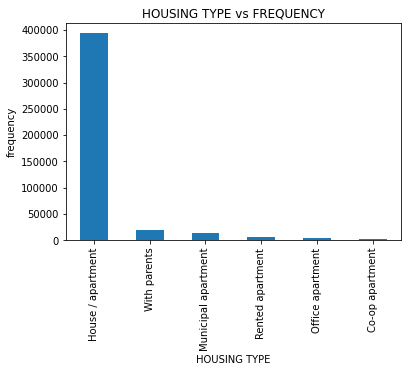

In [547]:
application_record['NAME_HOUSING_TYPE'].value_counts().plot(kind='bar')
plt.title('HOUSING TYPE vs FREQUENCY')
plt.xlabel('HOUSING TYPE')
plt.ylabel('frequency')

Text(0, 0.5, 'frequency')

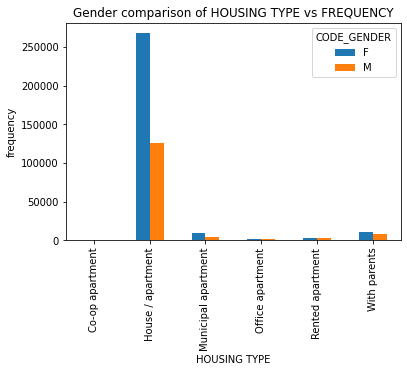

In [548]:
application_record.groupby(["NAME_HOUSING_TYPE", "CODE_GENDER"]).size().unstack(level=1).plot(kind='bar')
plt.title('Gender comparison of HOUSING TYPE vs FREQUENCY')
plt.xlabel('HOUSING TYPE')
plt.ylabel('frequency')

Observations:

* There are total six type of housing in this record: 'Rented apartment', 'House / apartment', 'Municipal apartment',       'With parents', 'Co-op apartment', 'Office apartment'
*   Most of the applicants live in Apartments/houses.
*   Few live with parents,in office appartment or rented apartment or municipal 
apartments
*  Pretty similar distributions for both genders

### OCCUPATION_TYPE
* Type of occupation of the applicant



In [549]:
application_record["OCCUPATION_TYPE"].unique()

array(['NAN', 'Security staff', 'Sales staff', 'Accountants', 'Laborers',
       'Managers', 'Drivers', 'Core staff', 'High skill tech staff',
       'Cleaning staff', 'Private service staff', 'Cooking staff',
       'Low-skill Laborers', 'Medicine staff', 'Secretaries',
       'Waiters/barmen staff', 'HR staff', 'Realty agents', 'IT staff'],
      dtype=object)

In [550]:
application_record["OCCUPATION_TYPE"].value_counts()

NAN                      134203
Laborers                  78240
Core staff                43007
Sales staff               41098
Managers                  35487
Drivers                   26090
High skill tech staff     17289
Accountants               15985
Medicine staff            13520
Cooking staff              8076
Security staff             7993
Cleaning staff             5845
Private service staff      3456
Low-skill Laborers         2140
Secretaries                2044
Waiters/barmen staff       1665
Realty agents              1041
HR staff                    774
IT staff                    604
Name: OCCUPATION_TYPE, dtype: int64

Text(0, 0.5, 'frequency')

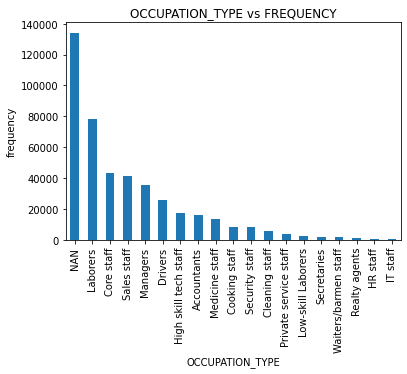

In [551]:
application_record['OCCUPATION_TYPE'].value_counts().plot(kind='bar')
plt.title('OCCUPATION_TYPE vs FREQUENCY')
plt.xlabel('OCCUPATION_TYPE')
plt.ylabel('frequency')

Text(0, 0.5, 'frequency')

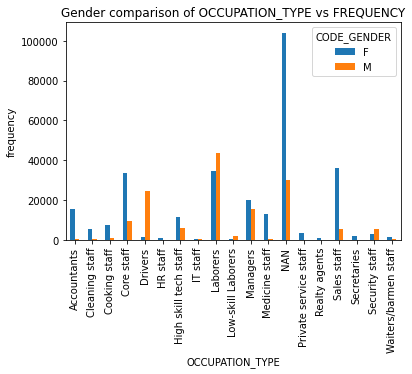

In [552]:
application_record.groupby(["OCCUPATION_TYPE", "CODE_GENDER"]).size().unstack(level=1).plot(kind='bar')
plt.title('Gender comparison of OCCUPATION_TYPE vs FREQUENCY')
plt.xlabel('OCCUPATION_TYPE')
plt.ylabel('frequency')

Conclusion:


*   There are many applicants whose occupation has not been mentioned, and for those we have created a new category-`NAN` 
*   Among those whose occupation was mentioned, most of them were Laborers or core staff or Sales Stuff or Managers or Drivers
*   Few applicants were IT staff, HR Staff, reality agents or others
*   We see there are lot more number of male applicants than the female applicants for occupation type - "LABORERS","LOW-SKILL LABORERS","SECURITY-STAFF","DRIVERS"
*   For rest of the occupation types, we have similar distributions



### FLAG_MOBIL


*   Represents if the applicant owns a mobile or not



In [553]:
application_record["FLAG_MOBIL"].unique()

array([1])

In [554]:
application_record["FLAG_MOBIL"].value_counts()

1    438557
Name: FLAG_MOBIL, dtype: int64

Text(0, 0.5, 'frequency')

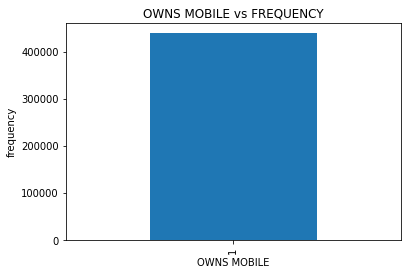

In [555]:
application_record['FLAG_MOBIL'].value_counts().plot(kind='bar')
plt.title('OWNS MOBILE vs FREQUENCY')
plt.xlabel('OWNS MOBILE')
plt.ylabel('frequency')

Observations:


*   All the applicants have their mobile phones. 
*   So, we can ignore this feature while training the models

In [556]:
application_record.drop(['FLAG_MOBIL'],axis=1)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,AGE,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,YEARS_EMPLOYED
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,32,1,0,0,NAN,2.0,12
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,32,1,0,0,NAN,2.0,12
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,58,0,0,0,Security staff,2.0,3
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52,0,1,1,Sales staff,1.0,8
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52,0,1,1,Sales staff,1.0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,M,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,62,0,0,0,NAN,1.0,-62
438553,6840222,F,N,N,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,43,0,0,0,Laborers,1.0,8
438554,6841878,F,N,N,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,22,1,0,0,Sales staff,1.0,1
438555,6842765,F,N,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,59,0,0,0,NAN,2.0,-59


### FLAG_WORK_PHONE

In [557]:
application_record["FLAG_WORK_PHONE"].unique()

array([1, 0])

In [558]:
application_record["FLAG_WORK_PHONE"].value_counts()

0    348156
1     90401
Name: FLAG_WORK_PHONE, dtype: int64

Text(0, 0.5, 'frequency')

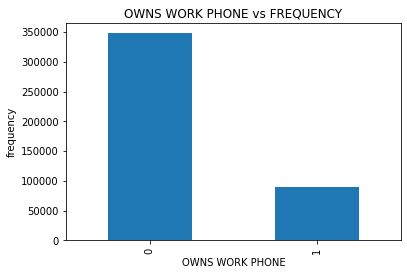

In [559]:
application_record['FLAG_WORK_PHONE'].value_counts().plot(kind='bar')
plt.title('OWNS WORK PHONE vs FREQUENCY')
plt.xlabel('OWNS WORK PHONE')
plt.ylabel('frequency')

Text(0, 0.5, 'frequency')

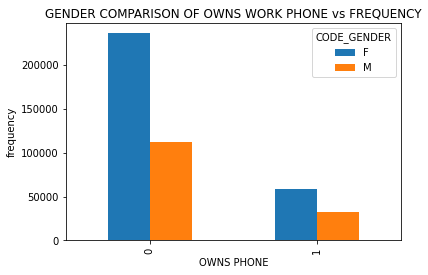

In [560]:
application_record.groupby(["FLAG_WORK_PHONE", "CODE_GENDER"]).size().unstack(level=1).plot(kind='bar')
plt.title('GENDER COMPARISON OF OWNS WORK PHONE vs FREQUENCY')
plt.xlabel('OWNS PHONE')
plt.ylabel('frequency')

Observations:


*   Most of the applicants had no work phone.

### FLAG_PHONE

In [561]:
application_record["FLAG_PHONE"].unique()

array([0, 1])

In [562]:
application_record["FLAG_PHONE"].value_counts()

0    312353
1    126204
Name: FLAG_PHONE, dtype: int64

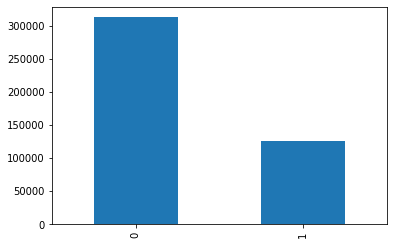

In [563]:
application_record['FLAG_PHONE'].value_counts().plot(kind='bar')

Observations:


*   Most of the applicants do not have phone

### FLAG_EMAIL

In [564]:
application_record["FLAG_EMAIL"].unique()

array([0, 1])

In [565]:
application_record["FLAG_EMAIL"].value_counts()

0    391102
1     47455
Name: FLAG_EMAIL, dtype: int64

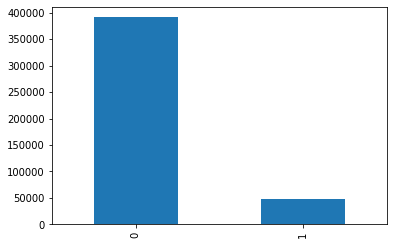

In [566]:
application_record['FLAG_EMAIL'].value_counts().plot(kind='bar')

Observations:


*   Almost all the applicant used email or had email id.

### CNT_CHILDREN

In [567]:
application_record["CNT_CHILDREN"].unique()

array([ 0,  1,  3,  2,  4,  5, 14, 19,  7,  9, 12,  6])

In [568]:
application_record["CNT_CHILDREN"].value_counts()

0     304071
1      88527
2      39884
3       5430
4        486
5        133
7          9
9          5
12         4
6          4
14         3
19         1
Name: CNT_CHILDREN, dtype: int64

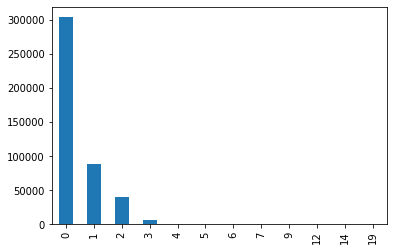

In [569]:
application_record['CNT_CHILDREN'].value_counts().sort_index(ascending=True).plot(kind='bar')

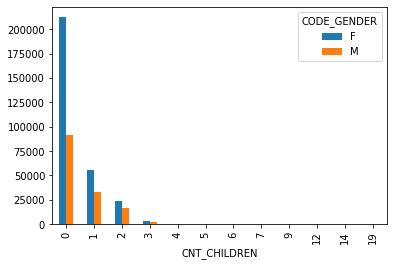

In [570]:
application_record.groupby(["CNT_CHILDREN", "CODE_GENDER"]).size().unstack(level=1).plot(kind='bar')

Conclusion:


*   The number of children of the applicant varies from 0 to 19
*   Most of the applicants has zero child and few have one, two or more children
*   Gender wise they have a pretty similar distributions



### CNT_FAM_MEMBERS

In [571]:
application_record["CNT_FAM_MEMBERS"].unique()

array([ 2.,  1.,  5.,  3.,  4.,  6., 15.,  7., 20.,  9., 11., 14.,  8.])

In [572]:
application_record["CNT_FAM_MEMBERS"].value_counts()

2.0     233891
1.0      84492
3.0      77128
4.0      37356
5.0       5081
6.0        459
7.0        124
9.0          9
11.0         5
14.0         4
8.0          4
15.0         3
20.0         1
Name: CNT_FAM_MEMBERS, dtype: int64

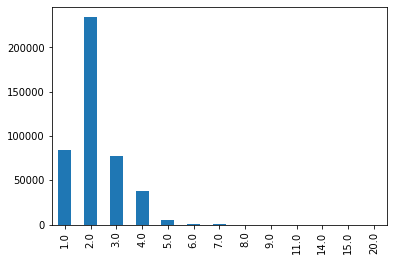

In [573]:
application_record['CNT_FAM_MEMBERS'].value_counts().sort_index(ascending = True).plot(kind='bar')

Observations:


*   Most of the applicants had two members in their family
*   There are significant number of applicants with one,three or four family members
*   A very few applicants had more than 6 family members
*   Maximum number of members in the family for a single applicant is 20

### AGE


In [574]:
application_record["AGE"].unique()

array([32, 58, 52, 61, 46, 48, 29, 27, 30, 34, 56, 43, 44, 45, 55, 42, 37,
       28, 57, 51, 54, 39, 24, 20, 38, 40, 33, 36, 35, 41, 59, 26, 50, 53,
       62, 60, 63, 25, 22, 23, 64, 47, 31, 49, 65, 21, 66, 67, 68, 69])

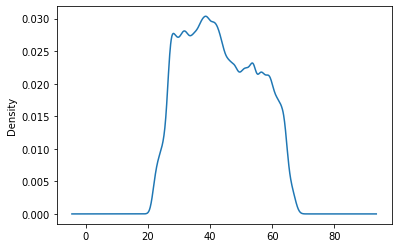

In [575]:
application_record['AGE'].plot(kind='kde')

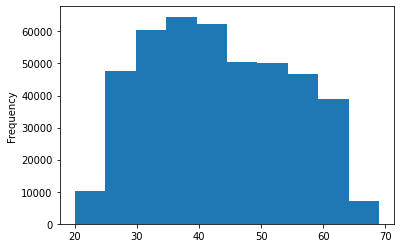

In [576]:
application_record['AGE'].plot.hist()

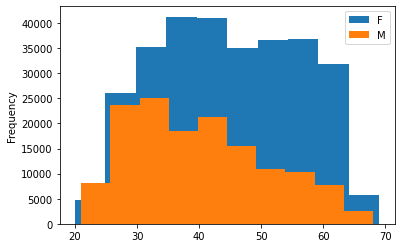

In [577]:
application_record.groupby('CODE_GENDER').AGE.plot.hist()
plt.legend()

Conclusion:


*   The age range of the applicants varies from 20 to 70 yrs
*   Maximum number of applicants lies in the age range of 30-40 yrs
*   For female applicant, most number applicants are in the range of 35 to 45 yrs
*   For male applicant, most number of applicants are in the range of 25 to 35 yrs.



In [578]:
### YEARS_EMPLOYED

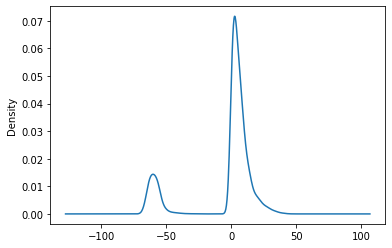

In [579]:
application_record['YEARS_EMPLOYED'].plot(kind='kde')

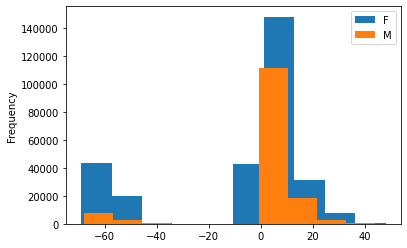

In [580]:
application_record.groupby('CODE_GENDER').YEARS_EMPLOYED.plot.hist()
plt.legend()

Conclusion:


*   From the analysis, I found that, people who were unemployed had the same value. That is, number of days that they have been unemployed is same for all which is `365243` that nearly equal to 1001 years.
*   So for such values we replaced the number of days of unemployment as their age
*   Apart from that we see, most of the people who have been working from 0 to 10 years has the most number of applications and frequency exponentially decreases as the years of employement increase.
*   Also we observe that, people who are umemployed for more than 40 years(their current age) also are applying for credit cards.

## 2.2 Credit Record Table

**Credit Record Notations**


*   **0**: 1-29 days past due 
*   **1**: 30-59 days past due 
*   **3**: 90-119 days overdue
*   **4**: 120-149 days overdue 
*   **5**: Overdue or bad debts, write-offs for more than 150 days 
*   **C**: paid off that month X: No loan for the month
*   **X**: No loan for the month

In [581]:
credit_record.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [582]:
credit_record.shape

(1048575, 3)

In [583]:
credit_record.describe()

,ID,MONTHS_BALANCE
count,1.048575e+06,1.048575e+06
mean,5.068286e+06,-1.913700e+01
std,4.615058e+04,1.402350e+01
min,5.001711e+06,-6.000000e+01
25%,5.023644e+06,-2.900000e+01
50%,5.062104e+06,-1.700000e+01
75%,5.113856e+06,-7.000000e+00
max,5.150487e+06,0.000000e+00


In [584]:
credit_record.isnull().sum(axis = 0)

ID                0
MONTHS_BALANCE    0
STATUS            0
dtype: int64

In [585]:
credit_record["MONTHS_BALANCE"].unique()

array([  0,  -1,  -2,  -3,  -4,  -5,  -6,  -7,  -8,  -9, -10, -11, -12,
       -13, -14, -15, -16, -17, -18, -19, -20, -21, -22, -23, -24, -25,
       -26, -27, -28, -29, -30, -31, -32, -33, -34, -35, -36, -37, -38,
       -39, -40, -41, -42, -43, -44, -45, -46, -47, -48, -49, -50, -51,
       -52, -53, -54, -55, -56, -57, -58, -59, -60])

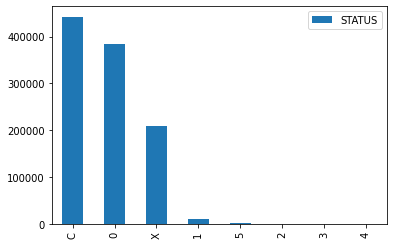

In [586]:
credit_record.STATUS.value_counts().plot(kind = "bar")
plt.legend()

### Observations:


*   Among all the credit records, most of the loans are paid or are due for a month
* Few applicants has 



## 2.3 Comparing APPLICATION RECORD and CREDIT RECORD

In [587]:
print(len(application_record.ID.unique()))
print(len(credit_record.ID.unique()))

438510
45985


In [588]:
app_record_id_list = application_record.ID.unique()
cred_record_id_list = credit_record.ID.unique()
print(len(np.intersect1d(app_record_id_list, cred_record_id_list)))

36457


### Observations:
* There are a lot applicants who are applying for credit cards and does not have any prior loans.
* Out of the 438,510 applicants, only 36,457 applicants had prior loan records.
* So, for training our model, we will have 36,457 data points only.

# 3. FEATURE ENGINEERING

* Right now, we do not have any target variable with us. So our first task is to create the target variable. We will be able to create the target variable from the `credit_record` table.
* Followed by that, we will merge the two tables and create our final data.
* Now, we will split the data into train and test and then perform feature engineering on the dataset.

## 3.1 CREDIT RECORD

Now that, we do not have any target variable, we would like to generate the target variable from the `credit record` table. To do so,
*  We will first classify the STATUS of each credit record into GOOD, BAD and NEUTRAL records. 
*  Followed by that, we will count the number of GOOD, BAD and NEUTRAL records for each ID.
*  Now depending on the number of Good, Bad and Neutral records, we will classify each applicant either AS GOOD(1) or BAD(0).


1.   #Good_Debt > #Neutral_Deb --> 1
2. #Good_Debt > #Bad_Debt --> 1
3.  #Neutral_Debt > #Good_Debt --> 0
4.  #Neutral_Debt > #Bad_Debt --> 1
5.  #Bad_Debt > #Good_Debt --> 0
6.  #Bad_Debt > #Neutral_Debt --> 0


The idea and the code for this credit_approval_status was taken from https://www.kaggle.com/code/tanulkumarsrivastava/99-4-accuracy-credit-card-approval-model 


In [589]:
convert_to = {'C' : 'Good_Debt', 'X' : 'Good_Debt', '0' : 'Good_Debt', '1' : 'Neutral_Debt', '2' : 'Neutral_Debt', '3' : 'Bad_Debt', '4' : 'Bad_Debt', '5' : 'Bad_Debt'}
credit_record.replace({'STATUS' : convert_to}, inplace=True)
print(credit_record.columns)
credit_record.head()

Index(['ID', 'MONTHS_BALANCE', 'STATUS'], dtype='object')


,ID,MONTHS_BALANCE,STATUS
0,5001711,0,Good_Debt
1,5001711,-1,Good_Debt
2,5001711,-2,Good_Debt
3,5001711,-3,Good_Debt
4,5001712,0,Good_Debt


In [590]:
credit_record.to_csv('/content/drive/MyDrive/DATA SCIENCE/CASE STUDY 1/updated_credit_record.csv',index = False,encoding = 'utf-8')

In [591]:
credit_record = credit_record.value_counts(subset=['ID', 'STATUS']).unstack(fill_value=0)
print(credit_record.columns)
credit_record.head()

Index(['Bad_Debt', 'Good_Debt', 'Neutral_Debt'], dtype='object', name='STATUS')


STATUS,Bad_Debt,Good_Debt,Neutral_Debt
ID,,,
5001711,0,4,0
5001712,0,19,0
5001713,0,22,0
5001714,0,15,0
5001715,0,60,0


In [592]:
credit_record.loc[(credit_record['Good_Debt'] > credit_record['Neutral_Debt']), 'CREDIT_APPROVAL_STATUS'] = 1
credit_record.loc[(credit_record['Good_Debt'] > credit_record['Bad_Debt']), 'CREDIT_APPROVAL_STATUS'] = 1
credit_record.loc[(credit_record['Neutral_Debt'] > credit_record['Good_Debt']), 'CREDIT_APPROVAL_STATUS'] = 0
credit_record.loc[(credit_record['Neutral_Debt'] > credit_record['Bad_Debt']), 'CREDIT_APPROVAL_STATUS'] = 1
credit_record.loc[(credit_record['Bad_Debt'] > credit_record['Good_Debt']), 'CREDIT_APPROVAL_STATUS'] = 0
credit_record.loc[(credit_record['Bad_Debt'] > credit_record['Neutral_Debt']), 'CREDIT_APPROVAL_STATUS'] = 0

In [593]:
credit_record.head()

STATUS,Bad_Debt,Good_Debt,Neutral_Debt,CREDIT_APPROVAL_STATUS
ID,,,,
5001711,0,4,0,1.0
5001712,0,19,0,1.0
5001713,0,22,0,1.0
5001714,0,15,0,1.0
5001715,0,60,0,1.0


In [594]:
credit_record.columns

Index(['Bad_Debt', 'Good_Debt', 'Neutral_Debt', 'CREDIT_APPROVAL_STATUS'], dtype='object', name='STATUS')

## 3.2 Merging Application Record and Credit Record

In [595]:
merged_data = application_record.merge(credit_record, how='inner', on=['ID'])
print(merged_data.columns)
print(merged_data.shape)
merged_data.head()

Index(['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'AGE', 'FLAG_MOBIL',
       'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'YEARS_EMPLOYED', 'Bad_Debt', 'Good_Debt',
       'Neutral_Debt', 'CREDIT_APPROVAL_STATUS'],
      dtype='object')
(36457, 22)


,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,YEARS_EMPLOYED,Bad_Debt,Good_Debt,Neutral_Debt,CREDIT_APPROVAL_STATUS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,0,0,NAN,2.0,12,0,15,1,1.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,0,0,NAN,2.0,12,0,14,1,1.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,...,0,0,0,Security staff,2.0,3,0,30,0,1.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,0,1,1,Sales staff,1.0,8,0,5,0,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,0,1,1,Sales staff,1.0,8,0,5,0,1.0


In [596]:
merged_data.to_csv('/content/drive/MyDrive/DATA SCIENCE/CASE STUDY 1/merged_data.csv',index = False,encoding = 'utf-8')

## 3.3 Train Test Split

In [597]:
df = pd.read_csv('/content/drive/MyDrive/DATA SCIENCE/CASE STUDY 1/merged_data.csv')
print(df.columns)
print(df.shape)
df.head()

Index(['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'AGE', 'FLAG_MOBIL',
       'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'YEARS_EMPLOYED', 'Bad_Debt', 'Good_Debt',
       'Neutral_Debt', 'CREDIT_APPROVAL_STATUS'],
      dtype='object')
(36457, 22)


,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,YEARS_EMPLOYED,Bad_Debt,Good_Debt,Neutral_Debt,CREDIT_APPROVAL_STATUS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,0,0,NAN,2.0,12,0,15,1,1.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,0,0,NAN,2.0,12,0,14,1,1.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,...,0,0,0,Security staff,2.0,3,0,30,0,1.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,0,1,1,Sales staff,1.0,8,0,5,0,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,0,1,1,Sales staff,1.0,8,0,5,0,1.0


In [598]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [599]:
print(X.shape)
print(y.shape)

(36457, 21)
(36457,)


In [600]:
from collections import Counter
counter = Counter(y)
print(counter)

Counter({1.0: 36281, 0.0: 176})


In [601]:
from imblearn.over_sampling import SMOTE

In [602]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=7)
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.10, random_state=7)
print("TRAINING DATA SHAPES")
print(X_train.shape)
print(y_train.shape)
print("CROSS VALIDATION DATA SHAPES")
print(X_cv.shape)
print(y_cv.shape)
print("TEST DATA SHAPES")
print(X_test.shape)
print(y_test.shape)

TRAINING DATA SHAPES
(29529, 21)
(29529,)
CROSS VALIDATION DATA SHAPES
(3282, 21)
(3282,)
TEST DATA SHAPES
(3646, 21)
(3646,)


In [603]:
X_cv.isnull().sum(axis = 0)

ID                     0
CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
AGE                    0
FLAG_MOBIL             0
FLAG_WORK_PHONE        0
FLAG_PHONE             0
FLAG_EMAIL             0
OCCUPATION_TYPE        0
CNT_FAM_MEMBERS        0
YEARS_EMPLOYED         0
Bad_Debt               0
Good_Debt              0
Neutral_Debt           0
dtype: int64

## 3.4. Feature Engineering

### 3.4.1 One-hot Encoding


*   In the dataset we have, there are not many features.
*   Among the features with categorical data, there are not many categories for each of them.
*   So we can use the One-hot encoding.
* **I prefer to use one-hot encoding over the Label Encoding as it gives a perspective of higher or lower to the categories.**



In [604]:
# #converting the categorical data into ONE HOT ENCODED FEATURES
# X_train = pd.get_dummies(X_train, columns = ['NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE'])
# X_cv = pd.get_dummies(X_cv, columns = ['NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE'])
# X_test = pd.get_dummies(X_test, columns = ['NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE'])

In [605]:

ohe = OneHotEncoder(sparse=False)
categorical_cols = ['NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE']
ohe.fit(X_train[categorical_cols])



def get_ohe(df):
    temp_df = pd.DataFrame(data=ohe.transform(df[categorical_cols]), columns=ohe.get_feature_names_out())
    df.drop(columns=categorical_cols, axis=1, inplace=True)
    df = pd.concat([df.reset_index(drop=True), temp_df], axis=1)
    return df


X_train = get_ohe(X_train)
X_cv = get_ohe(X_cv)
X_test = get_ohe(X_test)


In [606]:

filename = '/content/drive/MyDrive/DATA SCIENCE/CASE STUDY 1/OHE_CAT_1.sav'
pickle.dump(ohe, open(filename, 'wb'))

This shows that there are no new types of categorical data in the cross validation or test set. So we can continue.

### 3.1.2 Converting Binary Categorical features to numeric (0/1)

In [607]:
# label_encoder = preprocessing.LabelEncoder()

# # FOR X_TRAIN
# # Encode labels in column 'CODE_GENDER'.
# X_train['CODE_GENDER']= label_encoder.fit_transform(X_train['CODE_GENDER'])
# # Encode labels in column 'FLAG_OWN_CAR'.
# X_train['FLAG_OWN_CAR']= label_encoder.fit_transform(X_train['FLAG_OWN_CAR'])
# # Encode labels in column 'FLAG_OWN_REALTY'.
# X_train['FLAG_OWN_REALTY']= label_encoder.fit_transform(X_train['FLAG_OWN_REALTY'])
# # Encode labels in column 'FLAG_WORK_PHONE'.
# X_train['FLAG_WORK_PHONE']= label_encoder.fit_transform(X_train['FLAG_WORK_PHONE'])
# # Encode labels in column 'FLAG_PHONE'.
# X_train['FLAG_PHONE']= label_encoder.fit_transform(X_train['FLAG_PHONE'])
# # Encode labels in column 'FLAG_EMAIL'.
# X_train['FLAG_EMAIL']= label_encoder.fit_transform(X_train['FLAG_EMAIL'])





# #FOR X_cv
# # Encode labels in column 'CODE_GENDER'.
# X_cv['CODE_GENDER']= label_encoder.fit_transform(X_cv['CODE_GENDER'])
# # Encode labels in column 'FLAG_OWN_CAR'.
# X_cv['FLAG_OWN_CAR']= label_encoder.fit_transform(X_cv['FLAG_OWN_CAR'])
# # Encode labels in column 'FLAG_OWN_REALTY'.
# X_cv['FLAG_OWN_REALTY']= label_encoder.fit_transform(X_cv['FLAG_OWN_REALTY'])
# # Encode labels in column 'FLAG_WORK_PHONE'.
# X_cv['FLAG_WORK_PHONE']= label_encoder.fit_transform(X_cv['FLAG_WORK_PHONE'])
# # Encode labels in column 'FLAG_PHONE'.
# X_cv['FLAG_PHONE']= label_encoder.fit_transform(X_cv['FLAG_PHONE'])
# # Encode labels in column 'FLAG_EMAIL'.
# X_cv['FLAG_EMAIL']= label_encoder.fit_transform(X_cv['FLAG_EMAIL'])









# #FOR X_test
# # Encode labels in column 'CODE_GENDER'.
# X_test['CODE_GENDER']= label_encoder.fit_transform(X_test['CODE_GENDER'])
# # Encode labels in column 'FLAG_OWN_CAR'.
# X_test['FLAG_OWN_CAR']= label_encoder.fit_transform(X_test['FLAG_OWN_CAR'])
# # Encode labels in column 'FLAG_OWN_REALTY'.
# X_test['FLAG_OWN_REALTY']= label_encoder.fit_transform(X_test['FLAG_OWN_REALTY'])
# # Encode labels in column 'FLAG_WORK_PHONE'.
# X_test['FLAG_WORK_PHONE']= label_encoder.fit_transform(X_test['FLAG_WORK_PHONE'])
# # Encode labels in column 'FLAG_PHONE'.
# X_test['FLAG_PHONE']= label_encoder.fit_transform(X_test['FLAG_PHONE'])
# # Encode labels in column 'FLAG_EMAIL'.
# X_test['FLAG_EMAIL']= label_encoder.fit_transform(X_test['FLAG_EMAIL'])

In [608]:
# label_encoder = preprocessing.LabelEncoder()
# binary_categorical_columns = ['CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','FLAG_WORK_PHONE','FLAG_PHONE','FLAG_EMAIL']

# X_train[binary_categorical_columns] = X_train[binary_categorical_columns].apply(label_encoder().fit_transform)
# X_cv[binary_categorical_columns] = X_cv[binary_categorical_columns].apply(label_encoder().transform)
# X_test[binary_categorical_columns] = X_test[binary_categorical_columns].apply(label_encoder().transform)

In [609]:
lab_enc_gender = preprocessing.LabelEncoder()
lab_enc_gender.fit(X_train['CODE_GENDER'])
X_train['CODE_GENDER'] = lab_enc_gender.transform(X_train['CODE_GENDER'])
X_cv['CODE_GENDER'] = lab_enc_gender.transform(X_cv['CODE_GENDER'])
X_test['CODE_GENDER'] = lab_enc_gender.transform(X_test['CODE_GENDER'])

filename = '/content/drive/MyDrive/DATA SCIENCE/CASE STUDY 1/lab_enc_gender.sav'
pickle.dump(lab_enc_gender, open(filename, 'wb'))

In [610]:
lab_enc_car = preprocessing.LabelEncoder()
lab_enc_car.fit(X_train['FLAG_OWN_CAR'])
X_train['FLAG_OWN_CAR'] = lab_enc_car.transform(X_train['FLAG_OWN_CAR'])
X_cv['FLAG_OWN_CAR'] = lab_enc_car.transform(X_cv['FLAG_OWN_CAR'])
X_test['FLAG_OWN_CAR'] = lab_enc_car.transform(X_test['FLAG_OWN_CAR'])

filename = '/content/drive/MyDrive/DATA SCIENCE/CASE STUDY 1/lab_enc_car.sav'
pickle.dump(lab_enc_car, open(filename, 'wb'))

In [611]:
lab_enc_reality = preprocessing.LabelEncoder()
lab_enc_reality.fit(X_train['FLAG_OWN_REALTY'])
X_train['FLAG_OWN_REALTY'] = lab_enc_reality.transform(X_train['FLAG_OWN_REALTY'])
X_cv['FLAG_OWN_REALTY'] = lab_enc_reality.transform(X_cv['FLAG_OWN_REALTY'])
X_test['FLAG_OWN_REALTY'] = lab_enc_reality.transform(X_test['FLAG_OWN_REALTY'])

filename = '/content/drive/MyDrive/DATA SCIENCE/CASE STUDY 1/lab_enc_reality.sav'
pickle.dump(lab_enc_reality, open(filename, 'wb'))

In [612]:
lab_enc_work_phone = preprocessing.LabelEncoder()
lab_enc_work_phone.fit(X_train['FLAG_WORK_PHONE'])
X_train['FLAG_WORK_PHONE'] = lab_enc_work_phone.transform(X_train['FLAG_WORK_PHONE'])
X_cv['FLAG_WORK_PHONE'] = lab_enc_work_phone.transform(X_cv['FLAG_WORK_PHONE'])
X_test['FLAG_WORK_PHONE'] = lab_enc_work_phone.transform(X_test['FLAG_WORK_PHONE'])

filename = '/content/drive/MyDrive/DATA SCIENCE/CASE STUDY 1/lab_enc_work_phone.sav'
pickle.dump(lab_enc_work_phone, open(filename, 'wb'))

In [613]:
lab_enc_phone = preprocessing.LabelEncoder()
lab_enc_phone.fit(X_train['FLAG_PHONE'])
X_train['FLAG_PHONE'] = lab_enc_phone.transform(X_train['FLAG_PHONE'])
X_cv['FLAG_PHONE'] = lab_enc_phone.transform(X_cv['FLAG_PHONE'])
X_test['FLAG_PHONE'] = lab_enc_phone.transform(X_test['FLAG_PHONE'])

filename = '/content/drive/MyDrive/DATA SCIENCE/CASE STUDY 1/lab_enc_phone.sav'
pickle.dump(lab_enc_phone, open(filename, 'wb'))

In [614]:
lab_enc_email = preprocessing.LabelEncoder()
lab_enc_email.fit(X_train['FLAG_EMAIL'])
X_train['FLAG_EMAIL'] = lab_enc_email.transform(X_train['FLAG_EMAIL'])
X_cv['FLAG_EMAIL'] = lab_enc_email.transform(X_cv['FLAG_EMAIL'])
X_test['FLAG_EMAIL'] = lab_enc_email.transform(X_test['FLAG_EMAIL'])

filename = '/content/drive/MyDrive/DATA SCIENCE/CASE STUDY 1/lab_enc_email.sav'
pickle.dump(lab_enc_email, open(filename, 'wb'))

### 3.1.3 Standardizing the numeric features
 We will standarize the numeric features for better model performance. The feature that we will standarize are:
* CNT_CHILDREN
* AMT_INCOME_TOTAL
* AGE
* YEARS_EMPLOYED
* CNT_FAM_MEMBERS

In [615]:
col_names = ['CNT_CHILDREN', 'AMT_INCOME_TOTAL','AGE','YEARS_EMPLOYED','CNT_FAM_MEMBERS']
scaler = StandardScaler()
scaler.fit(X_train[col_names])

filename = '/content/drive/MyDrive/DATA SCIENCE/CASE STUDY 1/standard_scaler.sav'
pickle.dump(scaler, open(filename, 'wb'))

X_train[col_names] = scaler.transform(X_train[col_names])
X_cv[col_names] = scaler.transform(X_cv[col_names])
X_test[col_names] = scaler.transform(X_test[col_names])

In [616]:
# X_train['CNT_CHILDREN'] = (X_train['CNT_CHILDREN'] - X_train['CNT_CHILDREN'].mean()) / X_train['CNT_CHILDREN'].std()
# X_train['AMT_INCOME_TOTAL'] = (X_train['AMT_INCOME_TOTAL'] - X_train['AMT_INCOME_TOTAL'].mean()) / X_train['AMT_INCOME_TOTAL'].std()
# X_train['AGE'] = (X_train['AGE'] - X_train['AGE'].mean()) / X_train['AGE'].std()
# X_train['YEARS_EMPLOYED'] = (X_train['YEARS_EMPLOYED'] - X_train['YEARS_EMPLOYED'].mean()) / X_train['YEARS_EMPLOYED'].std()
# X_train['CNT_FAM_MEMBERS'] = (X_train['CNT_FAM_MEMBERS'] - X_train['CNT_FAM_MEMBERS'].mean()) / X_train['CNT_FAM_MEMBERS'].std()

In [617]:
# # Standardizing the cross validation and test data using TRAIN DATA

# X_cv['CNT_CHILDREN'] = (X_cv['CNT_CHILDREN'] - X_train['CNT_CHILDREN'].mean()) / X_train['CNT_CHILDREN'].std()
# X_cv['AMT_INCOME_TOTAL'] = (X_cv['AMT_INCOME_TOTAL'] - X_train['AMT_INCOME_TOTAL'].mean()) / X_train['AMT_INCOME_TOTAL'].std()
# X_cv['AGE'] = (X_cv['AGE'] - X_train['AGE'].mean()) / X_train['AGE'].std()
# X_cv['YEARS_EMPLOYED'] = (X_cv['YEARS_EMPLOYED'] - X_train['YEARS_EMPLOYED'].mean()) / X_train['YEARS_EMPLOYED'].std()
# X_cv['CNT_FAM_MEMBERS'] = (X_cv['CNT_FAM_MEMBERS'] - X_train['CNT_FAM_MEMBERS'].mean()) / X_train['CNT_FAM_MEMBERS'].std()




# X_test['CNT_CHILDREN'] = (X_test['CNT_CHILDREN'] - X_train['CNT_CHILDREN'].mean()) / X_train['CNT_CHILDREN'].std()
# X_test['AMT_INCOME_TOTAL'] = (X_test['AMT_INCOME_TOTAL'] - X_train['AMT_INCOME_TOTAL'].mean()) / X_train['AMT_INCOME_TOTAL'].std()
# X_test['AGE'] = (X_test['AGE'] - X_train['AGE'].mean()) / X_train['AGE'].std()
# X_test['YEARS_EMPLOYED'] = (X_test['YEARS_EMPLOYED'] - X_train['YEARS_EMPLOYED'].mean()) / X_train['YEARS_EMPLOYED'].std()
# X_test['CNT_FAM_MEMBERS'] = (X_test['CNT_FAM_MEMBERS'] - X_train['CNT_FAM_MEMBERS'].mean()) / X_train['CNT_FAM_MEMBERS'].std()

### 3.1.3 OCCUPATION_TYPES



*   There are a lot occupations that are missing.
*   We will use a few imputation techniques and then determine using logistic regression which imputation technique works best for us.



In [618]:
X_train['OCCUPATION_TYPE'] = X_train['OCCUPATION_TYPE'].replace(['NAN'],np.nan)
X_cv['OCCUPATION_TYPE'] = X_cv['OCCUPATION_TYPE'].replace(['NAN'],np.nan)
X_test['OCCUPATION_TYPE'] = X_test['OCCUPATION_TYPE'].replace(['NAN'],np.nan)

#### Trying to determine the type of missing value:


##### Detect the MCAR pattern


In order to detect an MCAR pattern, we can use statistical tests. One famous statistical test for this purpose is the  χ2  test. The  χ2  could be used to test goodness of fit, homogenity test and independence test. The latter will be used in this case to figure out if the missigness of data in the Height column is dependent (or not) on the other variables (columns).

The test starts by stating a first hypothesis called (the null hypothesis) and calculates a measure of closness between the observed data and the expected data (in the case where the null hypothesis is satisfied).

The null hypothesis in this case is the following:

H0 : There is no association between the missingness in the OCCUPATION column and the other columns. The critical  p -value associated to this test is equal to 0.05.

Let us first define the columns "Height_missing" that equals to True if Height is missing and False otherwise.



https://www.kaggle.com/code/yassirarezki/handling-missing-data-mcar-mar-and-mnar-part-i?scriptVersionId=35715263&cellId=36

In [619]:
# Initialize the missing columns
X_train["occ_missing"] = X_train["OCCUPATION_TYPE"]
# The column is false
X_train["occ_missing"] = False
# Replace where Occupation_missing with True where Occupation is missing
X_train.loc[X_train[X_train['OCCUPATION_TYPE'].isnull()].index, "occ_missing"] = True

In [620]:
# The first step is to detect if the missingness in the Height variable is relate to the Sex variable. 
# The Chi2 contngency test from the scipy library will be used. This requires tge establishement of the contengeny table.

X_train[X_train["occ_missing"]==True].groupby("CODE_GENDER")["occ_missing"].count()

CODE_GENDER
0    7091
1    2068
Name: occ_missing, dtype: int64

In [621]:
X_train[X_train["occ_missing"]==False].groupby("CODE_GENDER")["occ_missing"].count()

CODE_GENDER
0    12583
1     7787
Name: occ_missing, dtype: int64

In [622]:
table = [[7091, 2068],[12583,7787]]
from scipy.stats import chi2_contingency
chi2, p, dof, ex = chi2_contingency(table)
print("The p-value is esqual to {}".format(p))

The p-value is esqual to 3.4230998776222706e-153


**Conclusion 1:**

Since the  p -value is **less that 5%**, and that is statistically significant, so WE CAN REJECT THE NULL HYPOTHESIS.

**THUS THIS TYPE OF MISSING VALUE IS NOT OF MCAR TYPE.**

In [623]:
X_train = X_train.drop('occ_missing', 1)
X_train.columns

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


Index(['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'AGE', 'FLAG_MOBIL', 'FLAG_WORK_PHONE',
       'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'YEARS_EMPLOYED', 'Bad_Debt', 'Good_Debt', 'Neutral_Debt',
       'NAME_INCOME_TYPE_Commercial associate', 'NAME_INCOME_TYPE_Pensioner',
       'NAME_INCOME_TYPE_State servant', 'NAME_INCOME_TYPE_Student',
       'NAME_INCOME_TYPE_Working', 'NAME_EDUCATION_TYPE_Academic degree',
       'NAME_EDUCATION_TYPE_Higher education',
       'NAME_EDUCATION_TYPE_Incomplete higher',
       'NAME_EDUCATION_TYPE_Lower secondary',
       'NAME_EDUCATION_TYPE_Secondary / secondary special',
       'NAME_FAMILY_STATUS_Civil marriage', 'NAME_FAMILY_STATUS_Married',
       'NAME_FAMILY_STATUS_Separated',
       'NAME_FAMILY_STATUS_Single / not married', 'NAME_FAMILY_STATUS_Widow',
       'NAME_HOUSING_TYPE_Co-op apartment',
       'NAME_HOUSING_TYPE_House / apartment',
       'NAME

##### IMPUATATION TECHNIQUE : 0 --> DELETING THE FEATURE : `OCCUPATION_TYPE`

* We will delete the occupation_type feature

In [624]:
X_train_del = X_train.copy()
X_train_del = X_train_del.drop(['OCCUPATION_TYPE','ID'],1)
X_train_del.columns

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


Index(['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'AGE', 'FLAG_MOBIL', 'FLAG_WORK_PHONE',
       'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'YEARS_EMPLOYED',
       'Bad_Debt', 'Good_Debt', 'Neutral_Debt',
       'NAME_INCOME_TYPE_Commercial associate', 'NAME_INCOME_TYPE_Pensioner',
       'NAME_INCOME_TYPE_State servant', 'NAME_INCOME_TYPE_Student',
       'NAME_INCOME_TYPE_Working', 'NAME_EDUCATION_TYPE_Academic degree',
       'NAME_EDUCATION_TYPE_Higher education',
       'NAME_EDUCATION_TYPE_Incomplete higher',
       'NAME_EDUCATION_TYPE_Lower secondary',
       'NAME_EDUCATION_TYPE_Secondary / secondary special',
       'NAME_FAMILY_STATUS_Civil marriage', 'NAME_FAMILY_STATUS_Married',
       'NAME_FAMILY_STATUS_Separated',
       'NAME_FAMILY_STATUS_Single / not married', 'NAME_FAMILY_STATUS_Widow',
       'NAME_HOUSING_TYPE_Co-op apartment',
       'NAME_HOUSING_TYPE_House / apartment',
       'NAME_HOUSING_TYPE_Municipal a

In [625]:
X_cv_del = X_cv.drop(['OCCUPATION_TYPE','ID'],1)
X_test_del = X_test.drop(['OCCUPATION_TYPE','ID'],1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [626]:
print(X_train_del.shape)
print(X_cv_del.shape)
print(X_test_del.shape)

(29529, 36)
(3282, 36)
(3646, 36)


##### IMPUATATION TECHNIQUE : 1 --> Using NAN for IMPUTATION

* Here, we are replacing all the missing OCCUPATION TYPES by NAN which acts as a new category for OCCUPATION TYPE.
* This is what we have implemented earlier and will use it to check the performance of the model later on.

In [627]:
X_train_NAN = X_train.copy()
X_train_NAN['OCCUPATION_TYPE'] = X_train_NAN['OCCUPATION_TYPE'].fillna("NAN")

In [628]:
X_cv_NAN = X_cv.copy()
X_cv_NAN['OCCUPATION_TYPE'] = X_cv_NAN['OCCUPATION_TYPE'].fillna("NAN")

X_test_NAN = X_test.copy()
X_test_NAN['OCCUPATION_TYPE'] = X_test_NAN['OCCUPATION_TYPE'].fillna("NAN")

In [629]:
print(X_train_NAN.shape)
print(X_cv_NAN.shape)
print(X_test_NAN.shape)

(29529, 38)
(3282, 38)
(3646, 38)


##### IMPUATATION TECHNIQUE : 2 --> Training Decision Tree


*   With the available features, we will train the data using Decision Tree, in order to find the occupation_type for those applicants who does not have their occupation listed.
*   First we will check if the model give us satisfactory results and only then we will use this method to predict the occupation_type


In [630]:
temp_df = X_train.copy()
temp_df['OCCUPATION_TYPE'].fillna(value="NAN", inplace=True)
X_cv['OCCUPATION_TYPE'].fillna(value="NAN", inplace=True)
X_test['OCCUPATION_TYPE'].fillna(value="NAN", inplace=True)
temp_df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AGE,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,...,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents
0,5074676,1,0,1,-0.575768,0.597058,-0.541385,1,0,0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,5038759,0,0,1,0.764016,-0.729431,-0.541385,1,0,0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,5056111,0,0,0,2.103799,-0.862079,-0.367678,1,0,1,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,5078904,0,0,1,0.764016,-0.066186,-0.541385,1,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,5095018,0,0,1,-0.575768,0.375976,-0.715091,1,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [631]:
result_df_1 = temp_df.loc[temp_df['OCCUPATION_TYPE'] != "NAN"]
print(result_df_1.shape)
result_cv_1 = X_cv.loc[X_cv['OCCUPATION_TYPE'] != "NAN"]
print(result_cv_1.shape)
result_test_1 = X_test.loc[X_test['OCCUPATION_TYPE'] != "NAN"]
print(result_test_1.shape)

(20370, 38)
(2239, 38)
(2525, 38)


In [632]:
X_temp = result_df_1.drop(['OCCUPATION_TYPE','ID'],axis=1).values
y_temp = result_df_1['OCCUPATION_TYPE'].values
X_train_temp,X_test_temp,y_train_temp,y_test_temp = train_test_split(X_temp,y_temp,test_size=0.20,random_state=0)

In [633]:
print(X_train_temp.shape)
print(y_train_temp.shape)
print(X_test_temp.shape)
print(y_test_temp.shape)

(16296, 36)
(16296,)
(4074, 36)
(4074,)


In [634]:
clf = DecisionTreeClassifier(random_state=0)
print(cross_val_score(clf, X_train_temp, y_train_temp, cv=5))

[0.80797546 0.82233814 0.82387235 0.81712182 0.81006444]


In [635]:
# after checking the cross validation score on training the DECISION TREE, we see that,
# DT provides us with more than 80% accuracy for the OCCUPATION TYPE
# SO we will train the DECISION TREE on data for which we have the OCCUPATION TYPE
clf.fit(X_train_temp, y_train_temp)
y_pred = clf.predict(X_test_temp)

In [636]:
accuracy_score(y_test_temp, y_pred, normalize=True)

0.854688267059401

In [637]:
result_df_1.columns

Index(['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'AGE', 'FLAG_MOBIL', 'FLAG_WORK_PHONE',
       'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'YEARS_EMPLOYED', 'Bad_Debt', 'Good_Debt', 'Neutral_Debt',
       'NAME_INCOME_TYPE_Commercial associate', 'NAME_INCOME_TYPE_Pensioner',
       'NAME_INCOME_TYPE_State servant', 'NAME_INCOME_TYPE_Student',
       'NAME_INCOME_TYPE_Working', 'NAME_EDUCATION_TYPE_Academic degree',
       'NAME_EDUCATION_TYPE_Higher education',
       'NAME_EDUCATION_TYPE_Incomplete higher',
       'NAME_EDUCATION_TYPE_Lower secondary',
       'NAME_EDUCATION_TYPE_Secondary / secondary special',
       'NAME_FAMILY_STATUS_Civil marriage', 'NAME_FAMILY_STATUS_Married',
       'NAME_FAMILY_STATUS_Separated',
       'NAME_FAMILY_STATUS_Single / not married', 'NAME_FAMILY_STATUS_Widow',
       'NAME_HOUSING_TYPE_Co-op apartment',
       'NAME_HOUSING_TYPE_House / apartment',
       'NAME

In [638]:
result_df_1.insert(result_df_1.shape[1] - 1, 'OCCUPATION_TYPE', result_df_1.pop('OCCUPATION_TYPE'))

###### Predicting Occupation Types

In [639]:
#EXTRACTING DATA FOR THE APPLICANTS WHOSE OCCUPATION TYPE IS NOT MENTIONED
result_df_2 = temp_df.loc[temp_df['OCCUPATION_TYPE'] == "NAN"]
result_cv_2 = X_cv.loc[X_cv['OCCUPATION_TYPE'] == "NAN"]
result_test_2 = X_test.loc[X_test['OCCUPATION_TYPE'] == "NAN"]
print(result_df_2.shape)
print(result_cv_2.shape)
print(result_test_2.shape)

(9159, 38)
(1043, 38)
(1121, 38)


In [640]:
#PREDICTING DATA FOR THE APPLICANTS WHOSE OCCUPATION TYPE IS NOT MENTIONED
X_pred_occ = result_df_2.drop(['OCCUPATION_TYPE','ID'],axis=1).values
X_pred_occ_cv = result_cv_2.drop(['OCCUPATION_TYPE','ID'],axis=1).values
X_pred_occ_test = result_test_2.drop(['OCCUPATION_TYPE','ID'],axis=1).values
y_pred_occ = clf.predict(X_pred_occ)
y_pred_cv = clf.predict(X_pred_occ_cv)
y_pred_test = clf.predict(X_pred_occ_test)
print(y_pred_occ.shape)
print(y_pred_cv.shape)
print(y_pred_test.shape)

(9159,)
(1043,)
(1121,)


In [641]:
result_df_2['OCCUPATION_TYPE'] = y_pred_occ
result_cv_2['OCCUPATION_TYPE'] = y_pred_cv
result_test_2['OCCUPATION_TYPE'] = y_pred_test

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [642]:
result_df_2.insert(result_df_2.shape[1] - 1, 'OCCUPATION_TYPE', result_df_2.pop('OCCUPATION_TYPE'))
result_cv_2.insert(result_cv_2.shape[1] - 1, 'OCCUPATION_TYPE', result_cv_2.pop('OCCUPATION_TYPE'))
result_test_2.insert(result_test_2.shape[1] - 1, 'OCCUPATION_TYPE', result_test_2.pop('OCCUPATION_TYPE'))

###### Merging the two dataframes

In [643]:
X_train_DT = result_df_1.append(result_df_2, ignore_index=True)
X_cv_DT = result_cv_1.append(result_cv_2, ignore_index=True)
X_test_DT = result_test_1.append(result_test_2, ignore_index=True)

##### IMPUATATION TECHNIQUE : 3 --> Training Random Forest


*   With the available features, we will train the data using Random Forest, in order to find the occupation_type for those applicants who does not have their occupation listed.
*   First we will check if the model give us satisfactory results and only then we will use this method to predict the occupation_type


In [644]:
temp_df = X_train.copy()
temp_df['OCCUPATION_TYPE'].fillna(value="NAN", inplace=True)
X_cv['OCCUPATION_TYPE'].fillna(value="NAN", inplace=True)
X_test['OCCUPATION_TYPE'].fillna(value="NAN", inplace=True)
temp_df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AGE,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,...,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents
0,5074676,1,0,1,-0.575768,0.597058,-0.541385,1,0,0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,5038759,0,0,1,0.764016,-0.729431,-0.541385,1,0,0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,5056111,0,0,0,2.103799,-0.862079,-0.367678,1,0,1,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,5078904,0,0,1,0.764016,-0.066186,-0.541385,1,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,5095018,0,0,1,-0.575768,0.375976,-0.715091,1,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [645]:
result_df_1 = temp_df.loc[temp_df['OCCUPATION_TYPE'] != "NAN"]
print(result_df_1.shape)
result_cv_1 = X_cv.loc[X_cv['OCCUPATION_TYPE'] != "NAN"]
print(result_cv_1.shape)
result_test_1 = X_test.loc[X_test['OCCUPATION_TYPE'] != "NAN"]
print(result_test_1.shape)

(20370, 38)
(2239, 38)
(2525, 38)


In [646]:
X_temp = result_df_1.drop(['OCCUPATION_TYPE','ID'],axis=1).values
y_temp = result_df_1['OCCUPATION_TYPE'].values
X_train_temp,X_test_temp,y_train_temp,y_test_temp = train_test_split(X_temp,y_temp,test_size=0.20,random_state=0)

In [647]:
print(X_train_temp.shape)
print(y_train_temp.shape)
print(X_test_temp.shape)
print(y_test_temp.shape)

(16296, 36)
(16296,)
(4074, 36)
(4074,)


In [648]:
clf = RandomForestClassifier(random_state=0)
print(cross_val_score(clf, X_train_temp, y_train_temp, cv=5))

[0.85368098 0.87266033 0.87020558 0.86683032 0.87358085]


In [649]:
# after checking the cross validation score on training the DECISION TREE, we see that,
# DT provides us with more than 80% accuracy for the OCCUPATION TYPE
# SO we will train the DECISION TREE on data for which we have the OCCUPATION TYPE
clf.fit(X_train_temp, y_train_temp)
y_pred = clf.predict(X_test_temp)

In [650]:
accuracy_score(y_test_temp, y_pred, normalize=True)

0.8978890525282278

In [651]:
result_df_1.columns

Index(['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'AGE', 'FLAG_MOBIL', 'FLAG_WORK_PHONE',
       'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'YEARS_EMPLOYED', 'Bad_Debt', 'Good_Debt', 'Neutral_Debt',
       'NAME_INCOME_TYPE_Commercial associate', 'NAME_INCOME_TYPE_Pensioner',
       'NAME_INCOME_TYPE_State servant', 'NAME_INCOME_TYPE_Student',
       'NAME_INCOME_TYPE_Working', 'NAME_EDUCATION_TYPE_Academic degree',
       'NAME_EDUCATION_TYPE_Higher education',
       'NAME_EDUCATION_TYPE_Incomplete higher',
       'NAME_EDUCATION_TYPE_Lower secondary',
       'NAME_EDUCATION_TYPE_Secondary / secondary special',
       'NAME_FAMILY_STATUS_Civil marriage', 'NAME_FAMILY_STATUS_Married',
       'NAME_FAMILY_STATUS_Separated',
       'NAME_FAMILY_STATUS_Single / not married', 'NAME_FAMILY_STATUS_Widow',
       'NAME_HOUSING_TYPE_Co-op apartment',
       'NAME_HOUSING_TYPE_House / apartment',
       'NAME

In [652]:
result_df_1.insert(result_df_1.shape[1] - 1, 'OCCUPATION_TYPE', result_df_1.pop('OCCUPATION_TYPE'))

###### Predicting Occupation Types

In [653]:
#EXTRACTING DATA FOR THE APPLICANTS WHOSE OCCUPATION TYPE IS NOT MENTIONED
result_df_2 = temp_df.loc[temp_df['OCCUPATION_TYPE'] == "NAN"]
result_cv_2 = X_cv.loc[X_cv['OCCUPATION_TYPE'] == "NAN"]
result_test_2 = X_test.loc[X_test['OCCUPATION_TYPE'] == "NAN"]
print(result_df_2.shape)
print(result_cv_2.shape)
print(result_test_2.shape)

(9159, 38)
(1043, 38)
(1121, 38)


In [654]:
#PREDICTING DATA FOR THE APPLICANTS WHOSE OCCUPATION TYPE IS NOT MENTIONED
X_pred_occ = result_df_2.drop(['OCCUPATION_TYPE','ID'],axis=1).values
X_pred_occ_cv = result_cv_2.drop(['OCCUPATION_TYPE','ID'],axis=1).values
X_pred_occ_test = result_test_2.drop(['OCCUPATION_TYPE','ID'],axis=1).values
y_pred_occ = clf.predict(X_pred_occ)
y_pred_cv = clf.predict(X_pred_occ_cv)
y_pred_test = clf.predict(X_pred_occ_test)
print(y_pred_occ.shape)
print(y_pred_cv.shape)
print(y_pred_test.shape)

(9159,)
(1043,)
(1121,)


In [655]:
result_df_2['OCCUPATION_TYPE'] = y_pred_occ
result_cv_2['OCCUPATION_TYPE'] = y_pred_cv
result_test_2['OCCUPATION_TYPE'] = y_pred_test

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [656]:
result_df_2.insert(result_df_2.shape[1] - 1, 'OCCUPATION_TYPE', result_df_2.pop('OCCUPATION_TYPE'))
result_cv_2.insert(result_cv_2.shape[1] - 1, 'OCCUPATION_TYPE', result_cv_2.pop('OCCUPATION_TYPE'))
result_test_2.insert(result_test_2.shape[1] - 1, 'OCCUPATION_TYPE', result_test_2.pop('OCCUPATION_TYPE'))

###### Merging the two dataframes

In [657]:
X_train_RF = result_df_1.append(result_df_2, ignore_index=True)
X_cv_RF = result_cv_1.append(result_cv_2, ignore_index=True)
X_test_RF = result_test_1.append(result_test_2, ignore_index=True)

#### ENCODING OCCUPATION TYPE

In [658]:

ohe_occ = OneHotEncoder(sparse=False)
categorical_cols_2 = ['OCCUPATION_TYPE']
ohe_occ.fit(X_train_NAN[categorical_cols_2])



def get_ohe(df):
    temp_df = pd.DataFrame(data=ohe_occ.transform(df[categorical_cols_2]), columns=ohe_occ.get_feature_names_out())
    df.drop(columns=categorical_cols_2, axis=1, inplace=True)
    df = pd.concat([df.reset_index(drop=True), temp_df], axis=1)
    return df


X_train_NAN = get_ohe(X_train_NAN)
X_cv_NAN = get_ohe(X_cv_NAN)
X_test_NAN = get_ohe(X_test_NAN)

In [659]:
filename = '/content/drive/MyDrive/DATA SCIENCE/CASE STUDY 1/OHE_CAT_OCC.sav'
pickle.dump(ohe_occ, open(filename, 'wb'))

In [660]:
# X_train_NAN = pd.get_dummies(X_train_NAN, columns = ['OCCUPATION_TYPE'])
# X_cv_NAN = pd.get_dummies(X_cv_NAN, columns = ['OCCUPATION_TYPE'])
# X_test_NAN = pd.get_dummies(X_test_NAN, columns = ['OCCUPATION_TYPE'])


X_train_DT = pd.get_dummies(X_train_DT, columns = ['OCCUPATION_TYPE'])
X_cv_DT = pd.get_dummies(X_cv_DT, columns = ['OCCUPATION_TYPE'])
X_test_DT = pd.get_dummies(X_test_DT, columns = ['OCCUPATION_TYPE'])


X_train_RF = pd.get_dummies(X_train_RF, columns = ['OCCUPATION_TYPE'])
X_cv_RF = pd.get_dummies(X_cv_RF, columns = ['OCCUPATION_TYPE'])
X_test_RF = pd.get_dummies(X_test_RF, columns = ['OCCUPATION_TYPE'])

In [661]:
counter = Counter(y_train)
print(counter)
counter = Counter(y_cv)
print(counter)
counter = Counter(y_test)
print(counter)

Counter({1.0: 29392, 0.0: 137})
Counter({1.0: 3268, 0.0: 14})
Counter({1.0: 3621, 0.0: 25})


#### CHECKING FOR THE BEST IMPUTATION TECHNIQUE

* We have used total four imputation techniques, which are deleting the occupation_type feature, replacing the missing values with 'NAN', using Decision Tree and Random Forest to train and determine the OCCUPATION TYPE. 
* Now we need to determine the best imputation technique and for that, we can use a simple Logistic Regression models.
* We will train the 4 different types of imputed data and then determine the best result.

In [662]:
X_train_NAN = X_train_NAN.drop("ID",1) 
X_train_DT = X_train_DT.drop("ID",1) 
X_train_RF = X_train_RF.drop("ID",1) 

X_cv_NAN = X_cv_NAN.drop("ID",1) 
X_cv_DT = X_cv_DT.drop("ID",1) 
X_cv_RF = X_cv_RF.drop("ID",1) 

X_test_NAN = X_test_NAN.drop("ID",1) 
X_test_DT = X_test_DT.drop("ID",1) 
X_test_RF = X_test_RF.drop("ID",1) 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: 

In [663]:
print(X_train_del.shape)
print(X_cv_del.shape)
print(X_test_del.shape)
print("------------------")
print(X_train_NAN.shape)
print(X_cv_NAN.shape)
print(X_test_NAN.shape)
print("------------------")
print(X_train_DT.shape)
print(X_cv_DT.shape)
print(X_test_DT.shape)
print("------------------")
print(X_train_RF.shape)
print(X_cv_RF.shape)
print(X_test_RF.shape)

(29529, 36)
(3282, 36)
(3646, 36)
------------------
(29529, 55)
(3282, 55)
(3646, 55)
------------------
(29529, 54)
(3282, 54)
(3646, 54)
------------------
(29529, 54)
(3282, 54)
(3646, 54)


In [664]:
from sklearn.metrics import confusion_matrix
def print_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    print('True positive = ', cm[0][0])
    print('False positive = ', cm[0][1])
    print('False negative = ', cm[1][0])
    print('True negative = ', cm[1][1])

##### Imputation where the OCCUPATION_TYPE feature was deleted

In [665]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import KFold

In [666]:
counter = Counter(y_train)
print(counter)

Counter({1.0: 29392, 0.0: 137})


###### Handling imbalanced data : Random Over Sampler

In [667]:
from imblearn.over_sampling import RandomOverSampler

In [668]:
os=RandomOverSampler()
X_train_ns,y_train_ns=os.fit_resample(X_train_del,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

The number of classes before fit Counter({1.0: 29392, 0.0: 137})
The number of classes after fit Counter({1.0: 29392, 0.0: 29392})


In [669]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()
classifier.fit(X_train_ns,y_train_ns)

RandomForestClassifier()

In [670]:
y_pred_del_cv=classifier.predict(X_cv_del)
print_confusion_matrix(y_cv,y_pred_del_cv)
print(accuracy_score(y_cv,y_pred_del_cv))
print(classification_report(y_cv,y_pred_del_cv))

True positive =  13
False positive =  1
False negative =  0
True negative =  3268
0.9996953077391835
              precision    recall  f1-score   support

         0.0       1.00      0.93      0.96        14
         1.0       1.00      1.00      1.00      3268

    accuracy                           1.00      3282
   macro avg       1.00      0.96      0.98      3282
weighted avg       1.00      1.00      1.00      3282



##### Imputation where the null values were replaced by NAN for OCCUPATION_TYPE

###### Handling imbalanced data : Random Over Sampler

In [671]:
from imblearn.over_sampling import RandomOverSampler

In [672]:
os=RandomOverSampler()
X_train_ns,y_train_ns=os.fit_resample(X_train_NAN,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

The number of classes before fit Counter({1.0: 29392, 0.0: 137})
The number of classes after fit Counter({1.0: 29392, 0.0: 29392})


In [673]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()
classifier.fit(X_train_ns,y_train_ns)

RandomForestClassifier()

In [674]:
y_pred_nan_cv=classifier.predict(X_cv_NAN)
print_confusion_matrix(y_cv,y_pred_nan_cv)
print(accuracy_score(y_cv,y_pred_nan_cv))
print(classification_report(y_cv,y_pred_nan_cv))

True positive =  13
False positive =  1
False negative =  0
True negative =  3268
0.9996953077391835
              precision    recall  f1-score   support

         0.0       1.00      0.93      0.96        14
         1.0       1.00      1.00      1.00      3268

    accuracy                           1.00      3282
   macro avg       1.00      0.96      0.98      3282
weighted avg       1.00      1.00      1.00      3282



##### Imputation where the null values were determined after predicting the OCCUPTATION TYPE by training a Decision Tree

###### Handling imbalanced data : Random Over Sampler

In [675]:
from imblearn.over_sampling import RandomOverSampler

In [676]:
os=RandomOverSampler()
X_train_ns,y_train_ns=os.fit_resample(X_train_DT,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

The number of classes before fit Counter({1.0: 29392, 0.0: 137})
The number of classes after fit Counter({1.0: 29392, 0.0: 29392})


In [677]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()
classifier.fit(X_train_ns,y_train_ns)

RandomForestClassifier()

In [678]:
y_pred_DT_cv=classifier.predict(X_cv_DT)
print_confusion_matrix(y_cv,y_pred_DT_cv)
print(accuracy_score(y_cv,y_pred_DT_cv))
print(classification_report(y_cv,y_pred_DT_cv))

True positive =  0
False positive =  14
False negative =  22
True negative =  3246
0.9890310786106032
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        14
         1.0       1.00      0.99      0.99      3268

    accuracy                           0.99      3282
   macro avg       0.50      0.50      0.50      3282
weighted avg       0.99      0.99      0.99      3282



##### Imputation where the null values were determined after predicting the OCCUPTATION TYPE by training a Decision Tree

###### Handling imbalanced data : Random Over Sampler

In [679]:
from imblearn.over_sampling import RandomOverSampler

In [680]:
os=RandomOverSampler()
X_train_ns,y_train_ns=os.fit_resample(X_train_RF,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

The number of classes before fit Counter({1.0: 29392, 0.0: 137})
The number of classes after fit Counter({1.0: 29392, 0.0: 29392})


In [681]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()
classifier.fit(X_train_ns,y_train_ns)

RandomForestClassifier()

In [682]:
y_pred_RF_cv=classifier.predict(X_cv_RF)
print_confusion_matrix(y_cv,y_pred_RF_cv)
print(accuracy_score(y_cv,y_pred_RF_cv))
print(classification_report(y_cv,y_pred_RF_cv))

True positive =  0
False positive =  14
False negative =  21
True negative =  3247
0.9893357708714199
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        14
         1.0       1.00      0.99      0.99      3268

    accuracy                           0.99      3282
   macro avg       0.50      0.50      0.50      3282
weighted avg       0.99      0.99      0.99      3282



##### OBSERVATION:



*   Using Logistic Regression we get a very bad results while training
*   Thus we use Random Forest and get a considerably a better result.
*   Among all the imputation techniques, we see that, using missing values for occupation type as NAN gives us a better results than others. So we will use this imputation technique to train our final models



In [683]:
print(X_train_NAN.shape)
print(y_train.shape)

print(X_cv_NAN.shape)
print(y_cv.shape)

print(X_test_NAN.shape)
print(y_test.shape)


(29529, 55)
(29529,)
(3282, 55)
(3282,)
(3646, 55)
(3646,)


In [684]:
y_train.value_counts()

1.0    29392
0.0      137
Name: CREDIT_APPROVAL_STATUS, dtype: int64

In [685]:
data_train = X_train_NAN
data_train["APPROVAL STATUS"] = y_train.to_list()

print(data_train.shape)

data_cv = X_cv_NAN
data_cv["APPROVAL STATUS"] = y_cv.to_list()

print(data_cv.shape)



final_train_data = data_train.append(data_cv)
print(final_train_data.shape)
print(final_train_data.columns)
print(final_train_data.head())



final_train_data.to_csv("/content/drive/MyDrive/DATA SCIENCE/CASE STUDY 1/FINAL_TRAINING_DATA_NAN_ENCODING.csv", sep=';', encoding='utf-8',index = False)

(29529, 56)
(3282, 56)
(32811, 56)
Index(['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'AGE', 'FLAG_MOBIL', 'FLAG_WORK_PHONE',
       'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'YEARS_EMPLOYED',
       'Bad_Debt', 'Good_Debt', 'Neutral_Debt',
       'NAME_INCOME_TYPE_Commercial associate', 'NAME_INCOME_TYPE_Pensioner',
       'NAME_INCOME_TYPE_State servant', 'NAME_INCOME_TYPE_Student',
       'NAME_INCOME_TYPE_Working', 'NAME_EDUCATION_TYPE_Academic degree',
       'NAME_EDUCATION_TYPE_Higher education',
       'NAME_EDUCATION_TYPE_Incomplete higher',
       'NAME_EDUCATION_TYPE_Lower secondary',
       'NAME_EDUCATION_TYPE_Secondary / secondary special',
       'NAME_FAMILY_STATUS_Civil marriage', 'NAME_FAMILY_STATUS_Married',
       'NAME_FAMILY_STATUS_Separated',
       'NAME_FAMILY_STATUS_Single / not married', 'NAME_FAMILY_STATUS_Widow',
       'NAME_HOUSING_TYPE_Co-op apartment',
       'NAME_HOUSING_TYPE_House / apartment',
  

In [686]:
data_test = X_test_NAN
data_test["APPROVAL STATUS"] = y_test.to_list()

print(data_test.shape)

(3646, 56)


In [687]:
data_test.to_csv("/content/drive/MyDrive/DATA SCIENCE/CASE STUDY 1/FINAL_TEST_DATA_NAN_ENCODING.csv", sep=';', encoding='utf-8',index = False)